In [1]:
import pandas as pd

#### Load the dataset

In [2]:
data = pd.read_csv("dataset/loan_approval_dataset.csv")

##### Exploratory Data Analysis

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
# drop the id columns 
data.drop(['loan_id'], axis=1,inplace=True )

In [8]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
# Removed extra spaces from all the column names
data.columns = data.columns.str.strip()

In [10]:
# Removed extra spaces from loan_status column values
data["loan_status"] = data["loan_status"].str.strip()


In [11]:
data["loan_status"] = [1 if value == "Approved" else 0 for value in data.loan_status]
data.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


<Axes: xlabel='loan_status'>

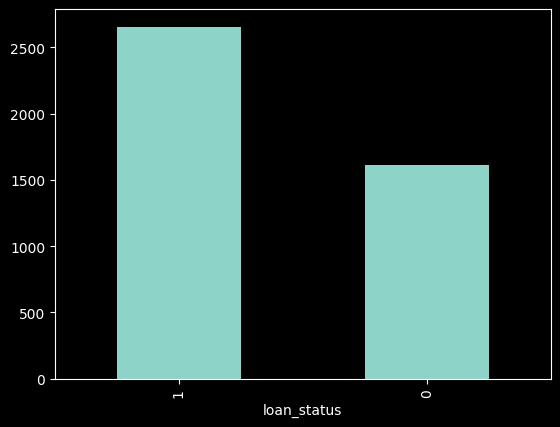

In [12]:
# Bar chart for visualizing the values counts of the "loan_status" column
data["loan_status"].value_counts().plot(kind="bar")

In [13]:
# Remove spaces from 'education' and 'self_employed' column values

data["education"] = data["education"].str.strip()
data["self_employed"] = data["self_employed"].str.strip()


In [14]:
print(data["education"].values)
print(data["self_employed"].values)

['Graduate' 'Not Graduate' 'Graduate' ... 'Not Graduate' 'Not Graduate'
 'Graduate']
['No' 'Yes' 'No' ... 'No' 'No' 'No']


In [15]:
# Label encoding on 'education' columns. 1 as 'Graduate' and 0 as 'Not Graduate'

data["education"] = [1 if value == "Graduate" else 0 for value in data.education]

In [16]:
data["self_employed"] = [1 if value == "Yes" else 0 for value in data.self_employed]


In [17]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


#### Seperate target variable and predictors

In [18]:
# Separating features and target variable
X = data.drop('loan_status', axis=1)
y = data['loan_status']

#### Normalize the data

In [24]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit the scaler to that data and transform the data
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[-0.2941017 ,  0.99555917, -1.00728821, ...,  2.877289  ,
         0.83202837,  0.93030441],
       [-1.4735476 , -1.00446064,  0.99276452, ..., -0.63192107,
        -0.69499321, -0.51593638],
       [ 0.29562125,  0.99555917, -1.00728821, ..., -0.10781827,
         1.99651964,  2.40731629],
       ...,
       [-0.2941017 , -1.00446064, -1.00728821, ...,  1.69236092,
         0.3266831 ,  0.71490685],
       [-0.88382465, -1.00446064, -1.00728821, ..., -0.97372725,
        -0.11274758,  0.25334064],
       [-0.88382465,  0.99555917, -1.00728821, ...,  1.55563845,
         2.26017804,  2.16114764]])

#### Split the data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

#### Train the model

In [27]:
from sklearn.linear_model import LogisticRegression

# create the lr model
lr = LogisticRegression()

# train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable on test data

y_pred = lr.predict(X_test)

In [28]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

#### Evaluation of the model

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.90
